In [1]:
import os
import pandas as pd
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

In [2]:
# Define the base path where the files are located
base_path = "C:/Users/admin/Documents/DeepLearning/Project/Computer_Vision/isic-2024-challenge"
train_metadata = pd.read_csv(os.path.join(base_path, "train-metadata.csv"))

C:\Users\admin\AppData\Local\Temp\ipykernel_1824\471738222.py:3: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata = pd.read_csv(os.path.join(base_path, "train-metadata.csv"))


In [3]:
# Display the first few rows of the DataFrame
print(train_metadata.head())
print(train_metadata.info())
print(train_metadata.describe())


        isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx

In [4]:
# Check for duplicates in the 'isic_id' column
duplicates = train_metadata.duplicated(subset='patient_id', keep=False)
duplicate_rows = train_metadata[duplicates]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Display the results
print(f"Number of duplicate rows based on 'patient_id': {num_duplicates}")

  

Number of duplicate rows based on 'patient_id': 401054


In [5]:
#Display 10 first duplicate
print(duplicate_rows.head(10))

        isic_id  target  patient_id  age_approx     sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0    male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0    male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0    male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0    male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0    male      anterior torso   
5  ISIC_0035502       0  IP_3026693        75.0  female           head/neck   
6  ISIC_0051648       0  IP_0218255        65.0    male     upper extremity   
7  ISIC_0051665       0  IP_7734648        50.0    male     posterior torso   
8  ISIC_0051710       0  IP_1307115        50.0    male      anterior torso   
9  ISIC_0051758       0  IP_2180091        60.0  female     upper extremity   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3

In [6]:
# Example of duplicate
# Specify the patient IDs to filter
patient_ids = ['IP_1235828', 'IP_8170065']

# Filter the DataFrame for the specified patient IDs
is_patient_id = train_metadata['patient_id'].isin(patient_ids)
filtered_data = train_metadata[is_patient_id]
print(filtered_data)

             isic_id  target  patient_id  age_approx   sex  \
0       ISIC_0015670       0  IP_1235828        60.0  male   
1       ISIC_0015845       0  IP_8170065        60.0  male   
131     ISIC_0076432       0  IP_1235828        60.0  male   
2072    ISIC_0124587       0  IP_1235828        60.0  male   
2332    ISIC_0130299       0  IP_1235828        60.0  male   
...              ...     ...         ...         ...   ...   
397840  ISIC_9919878       0  IP_1235828        60.0  male   
398195  ISIC_9929307       0  IP_1235828        60.0  male   
398396  ISIC_9934582       0  IP_1235828        60.0  male   
399576  ISIC_9963797       0  IP_1235828        60.0  male   
400809  ISIC_9994034       0  IP_8170065        60.0  male   

       anatom_site_general  clin_size_long_diam_mm          image_type  \
0          lower extremity                    3.04  TBP tile: close-up   
1                head/neck                    1.10  TBP tile: close-up   
131        posterior torso       

We can see sevearl image per patient_id.In case of no proble, the variables lesion_id, iddx_2, iddx_3, iddx_4,  iddx_5, mel_mitotic_index,  mel_thick_mm have NA for value.

In [7]:
#Focus on NA for varaible age, sex, anatom
# Select columns 3-5 +ptient_Id
cols_2_to_5 = train_metadata.iloc[:, 2:6]


# Initialize a dictionary to store results
results = {}

# Loop through each column of interest
for col in cols_2_to_5:
    # Identify rows with NA values in the column
    na_rows = train_metadata[train_metadata[col].isna()]
    
    # Get the patient IDs associated with these rows
    patient_ids_with_na = na_rows['patient_id'].unique()
    
    # Check if these patient IDs have values in the same column
    filtered_data_patient_na = train_metadata[train_metadata['patient_id'].isin(patient_ids_with_na)]
    non_na_rows = filtered_data_patient_na.dropna(subset=[col])
    
    # Count the number of rows for these patient IDs where the column has data
    count_non_na_rows = len(non_na_rows)
    
    # Store the results
    results[col] = {
        'number_of_na': len(na_rows),
        'number_of_unique_patient_ids_with_na': len(patient_ids_with_na),
        'number_of_rows_with_data': count_non_na_rows
    }

# Print the results
for col, res in results.items():
    print(f"Column: {col}")
    print(f"  Number of NA values: {res['number_of_na']}")
    print(f"  Number of unique patient IDs with NA: {res['number_of_unique_patient_ids_with_na']}")
    print(f"  Number of rows with data for these patient IDs: {res['number_of_rows_with_data']}")
    print()


Column: patient_id
  Number of NA values: 0
  Number of unique patient IDs with NA: 0
  Number of rows with data for these patient IDs: 0

Column: age_approx
  Number of NA values: 2798
  Number of unique patient IDs with NA: 13
  Number of rows with data for these patient IDs: 0

Column: sex
  Number of NA values: 11517
  Number of unique patient IDs with NA: 33
  Number of rows with data for these patient IDs: 0

Column: anatom_site_general
  Number of NA values: 5756
  Number of unique patient IDs with NA: 35
  Number of rows with data for these patient IDs: 14977



In [8]:
# Zero value
#Exluding column 1
columns_to_zero = train_metadata.drop(train_metadata.columns[1], axis=1)

# Identify rows with at least one zero value, excluding column 1
zero_mask = columns_to_zero.eq(0).any(axis=1)
rows_with_zero = train_metadata[zero_mask]


#Display the nber of rows
print(f"Number of rows with at least one zero value: {len(rows_with_zero)}")

# Display the rows
if len(rows_with_zero) > 0:
    print("Rows with at least one zero value:")
    print(rows_with_zero)
else:
    print("No rows with zero values found.")

Number of rows with at least one zero value: 47205
Rows with at least one zero value:
             isic_id  target  patient_id  age_approx     sex  \
0       ISIC_0015670       0  IP_1235828        60.0    male   
1       ISIC_0015845       0  IP_8170065        60.0    male   
2       ISIC_0015864       0  IP_6724798        60.0    male   
4       ISIC_0024200       0  IP_8313778        55.0    male   
5       ISIC_0035502       0  IP_3026693        75.0  female   
...              ...     ...         ...         ...     ...   
401005  ISIC_9998933       0  IP_4211990        55.0  female   
401006  ISIC_9998938       0  IP_5296073        60.0    male   
401008  ISIC_9999003       0  IP_4106376        65.0    male   
401020  ISIC_9999207       0  IP_4506900        40.0    male   
401049  ISIC_9999817       0  IP_1117889        55.0  female   

       anatom_site_general  clin_size_long_diam_mm          image_type  \
0          lower extremity                    3.04  TBP tile: close-up 

check for variable color if value =0 is ok

In [9]:
#Number of unique patient
# Drop duplicate rows based on 'patient_id'
unique_patients = train_metadata.drop_duplicates(subset='patient_id')
unique_patients_count=unique_patients.value_counts()
# Print the result
print(f"Number of unique patient: {unique_patients_count}")



#Number of picture by patient
# Count the number of photos (isic_id) for each patient (patient_id)
photo_counts = train_metadata.groupby('patient_id').size()

# Calculate the average number of photos per patient
average_photos_per_patient = photo_counts.mean()

# Print the result
print(f"Average number of photos per patient: {average_photos_per_patient:.2f}")


Number of unique patient: Series([], Name: count, dtype: int64)
Average number of photos per patient: 384.89


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


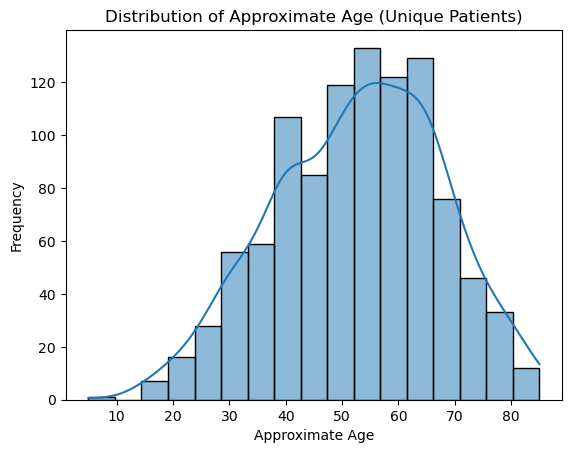

In [10]:
# Plot the distribution of 'age_approx' for unique patients
sns.histplot(unique_patients['age_approx'], kde=True)
plt.title("Distribution of Approximate Age (Unique Patients)")
plt.xlabel("Approximate Age")
plt.ylabel("Frequency")
plt.show()

In [11]:
# Select columns without NA
column_wo_na = train_metadata.iloc[:, list(range(6, 44)) + list(range(46, 47)) + [54]]


# Print the selected columns
print(column_wo_na)

        clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  \
0                         3.04  TBP tile: close-up     3D: white  20.244422   
1                         1.10  TBP tile: close-up     3D: white  31.712570   
2                         3.40  TBP tile: close-up        3D: XP  22.575830   
3                         3.22  TBP tile: close-up        3D: XP  14.242329   
4                         2.73  TBP tile: close-up     3D: white  24.725520   
...                        ...                 ...           ...        ...   
401054                    6.80  TBP tile: close-up        3D: XP  22.574335   
401055                    3.11  TBP tile: close-up     3D: white  19.977640   
401056                    2.05  TBP tile: close-up        3D: XP  17.332567   
401057                    2.80  TBP tile: close-up        3D: XP  22.288570   
401058                    3.30  TBP tile: close-up        3D: XP  16.792900   

        tbp_lv_Aext   tbp_lv_B  tbp_lv_Bext   tbp_l

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


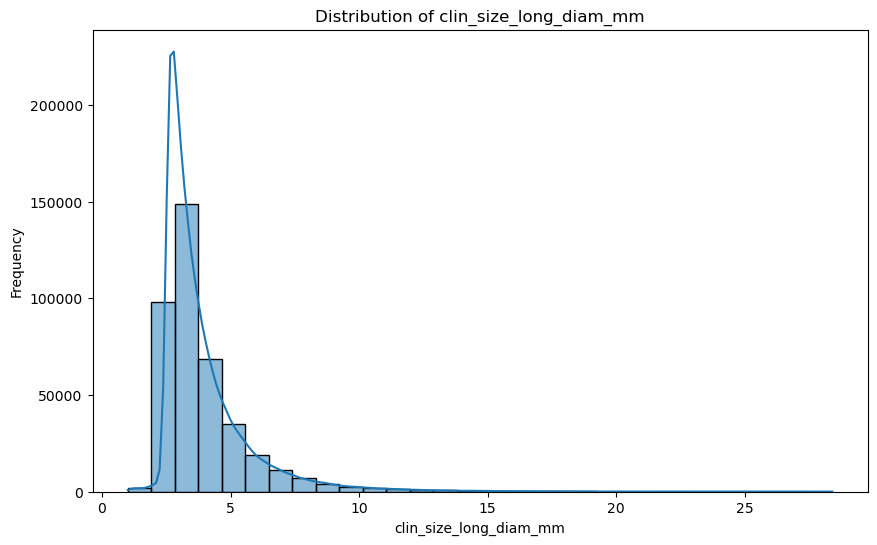

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


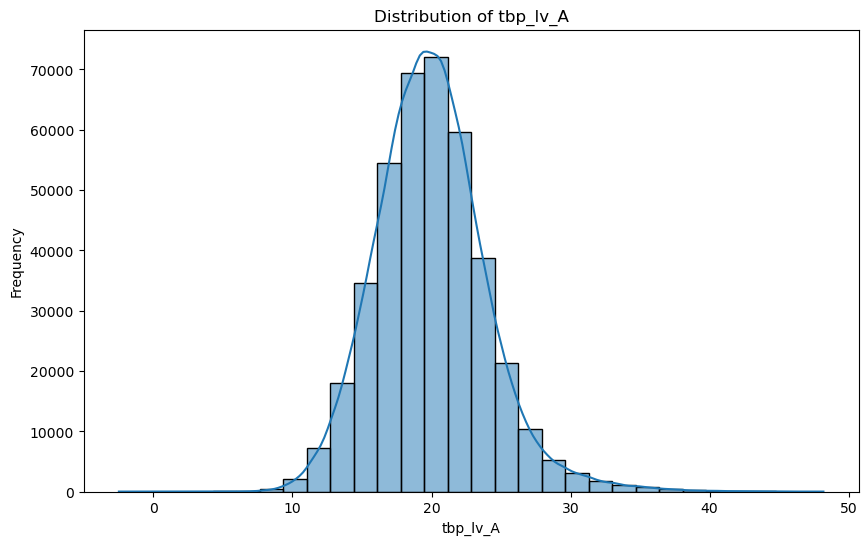

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


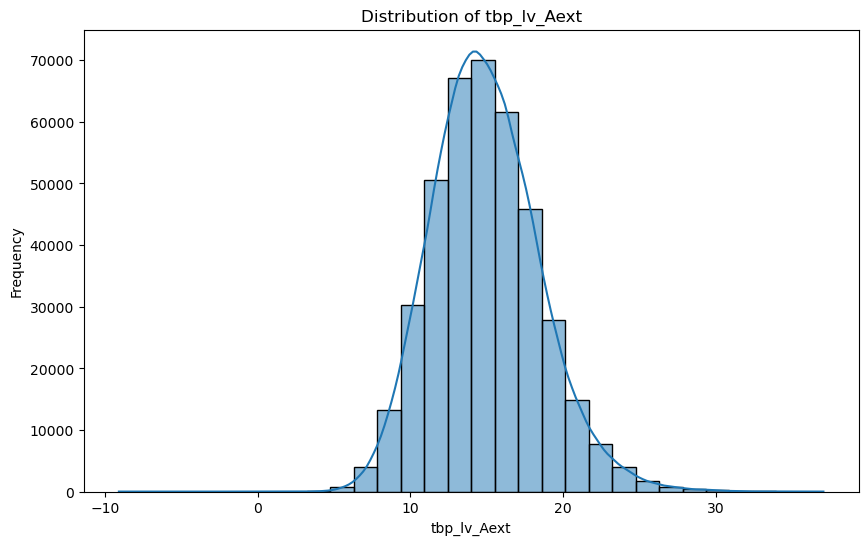

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


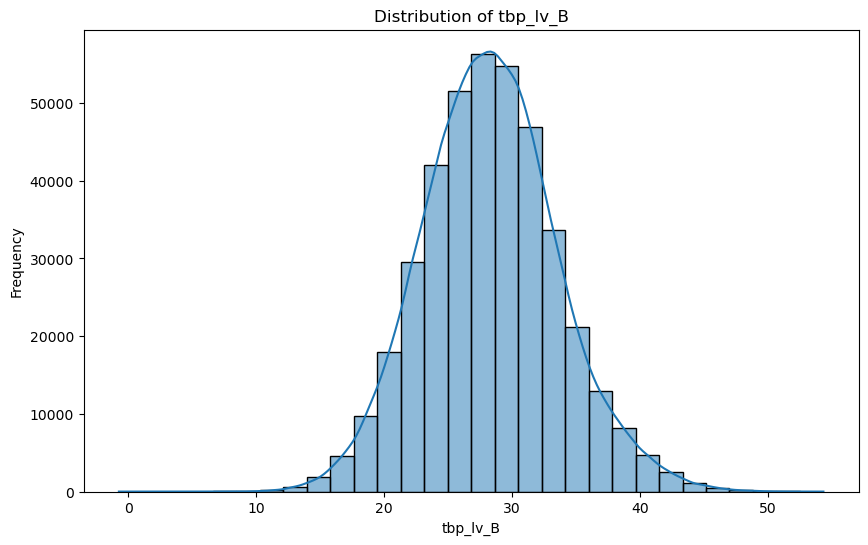

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


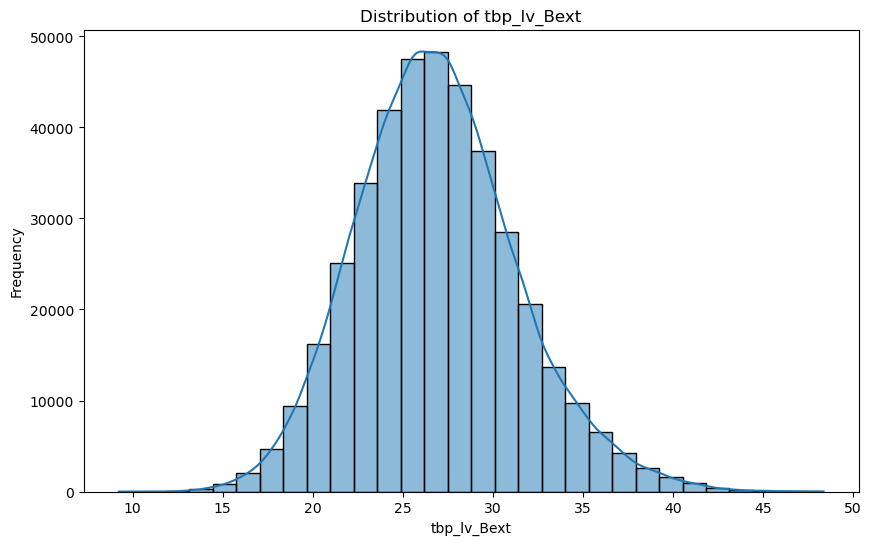

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


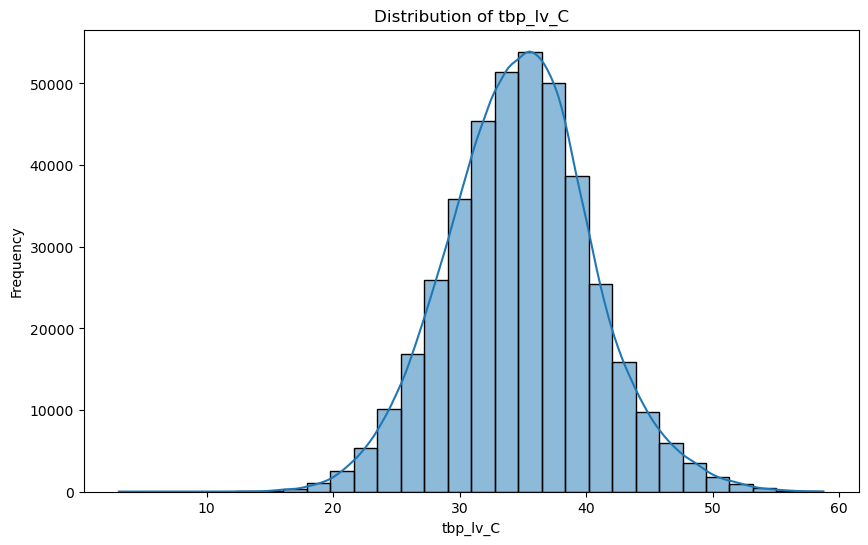

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


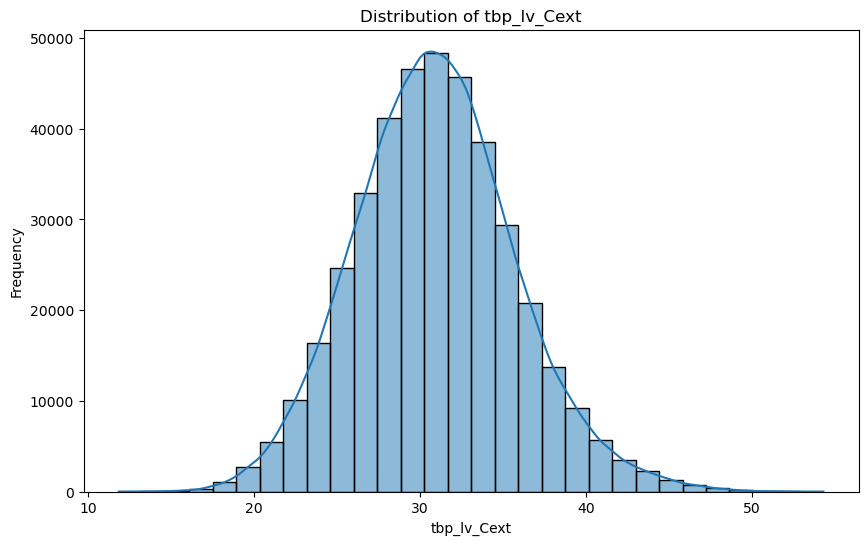

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


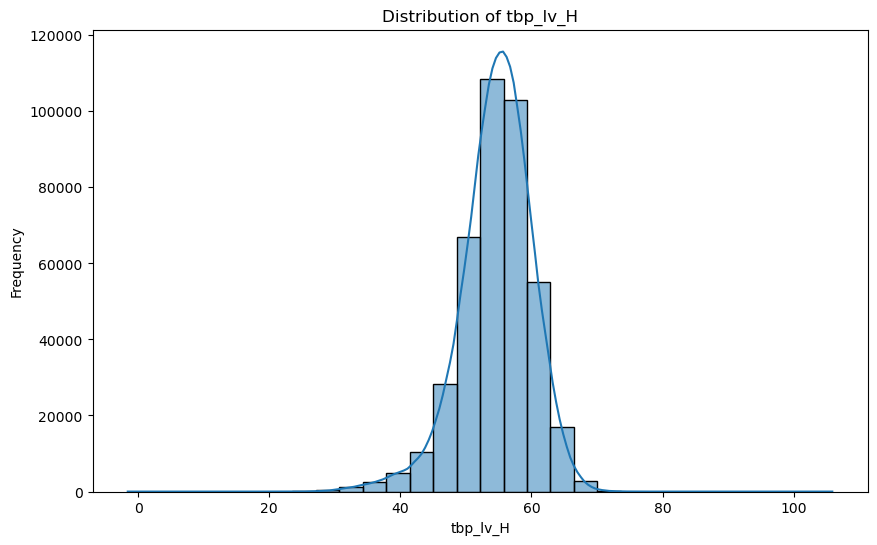

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


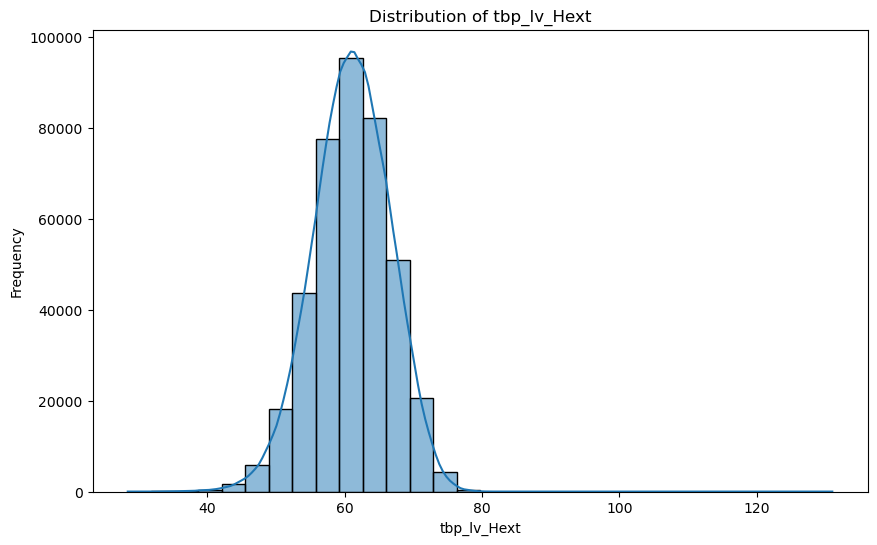

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


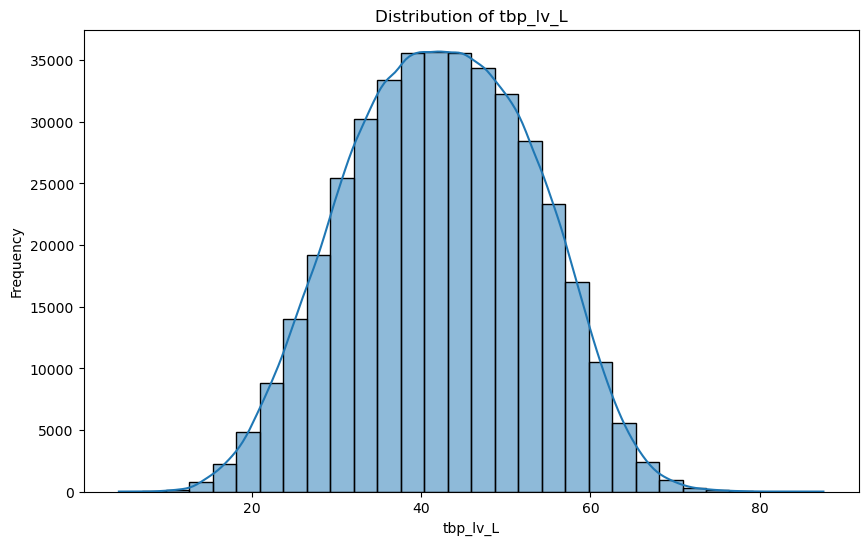

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


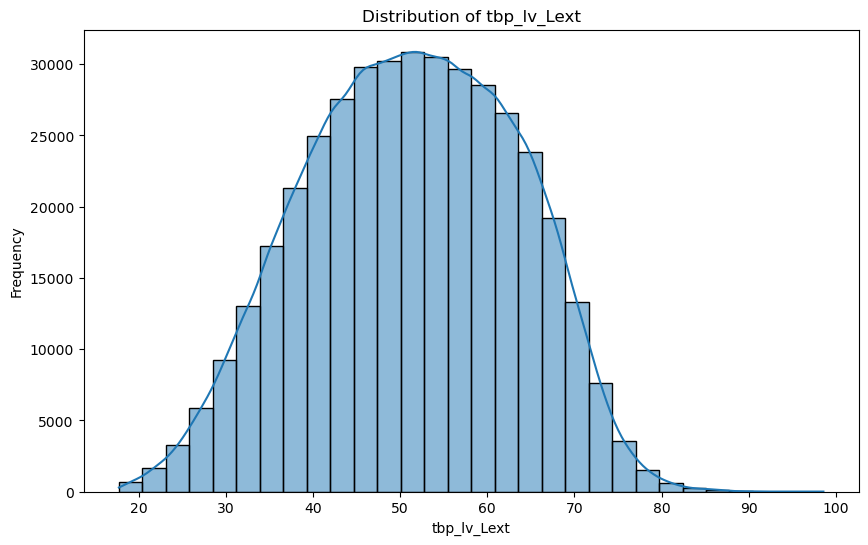

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


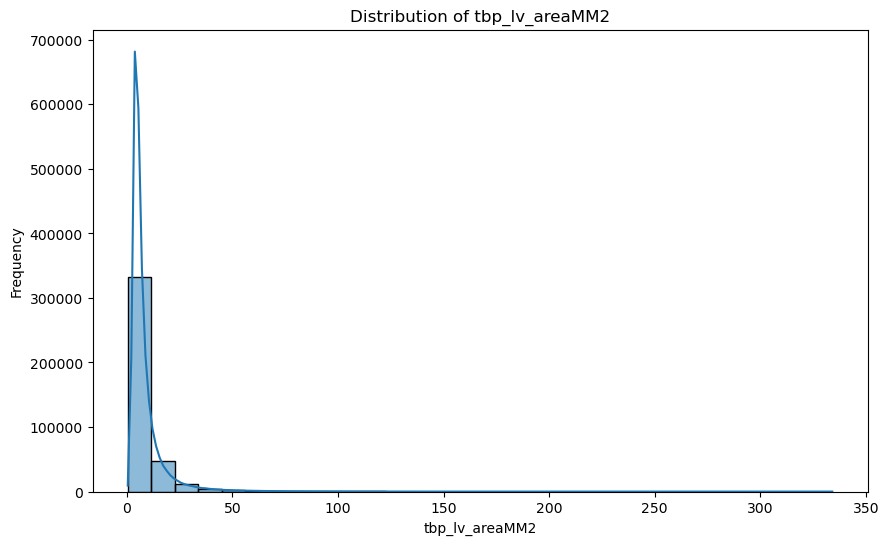

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


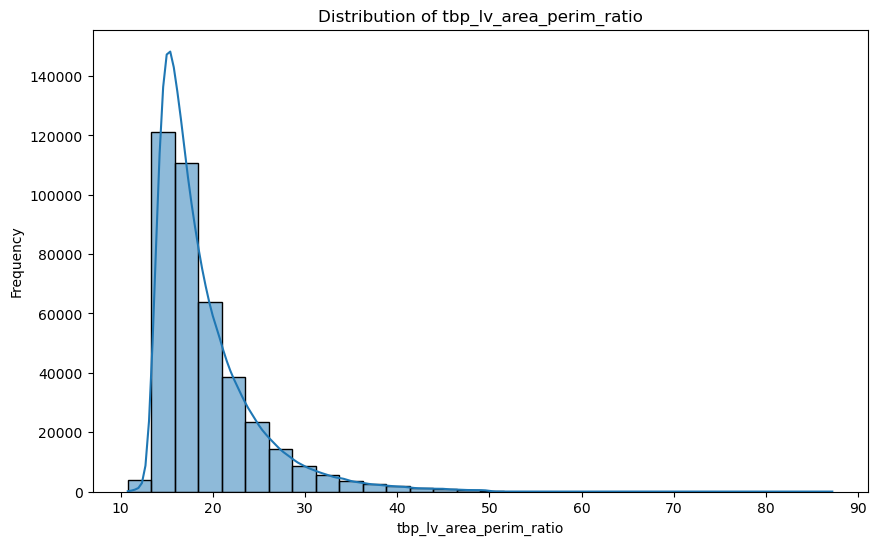

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


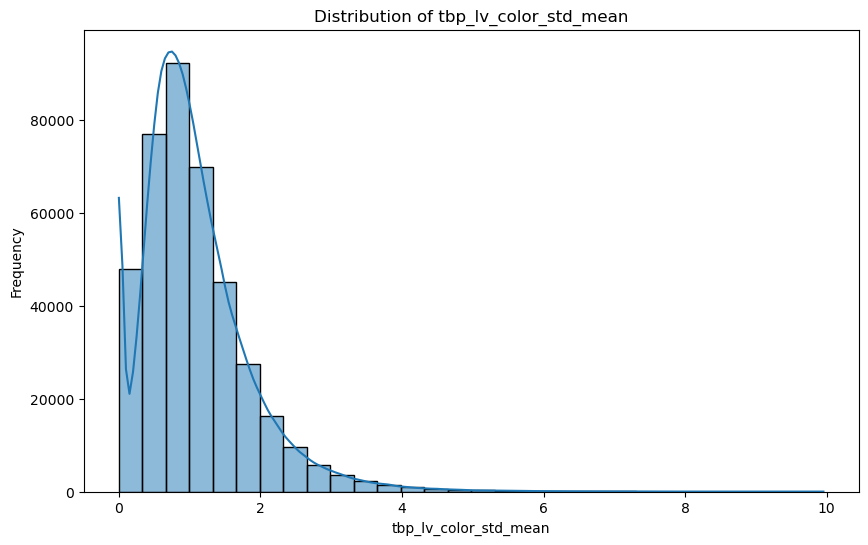

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


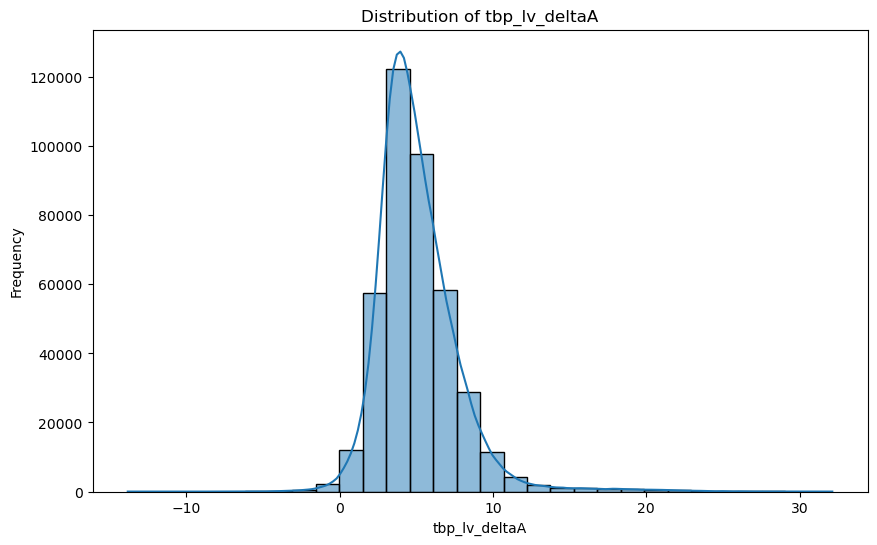

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


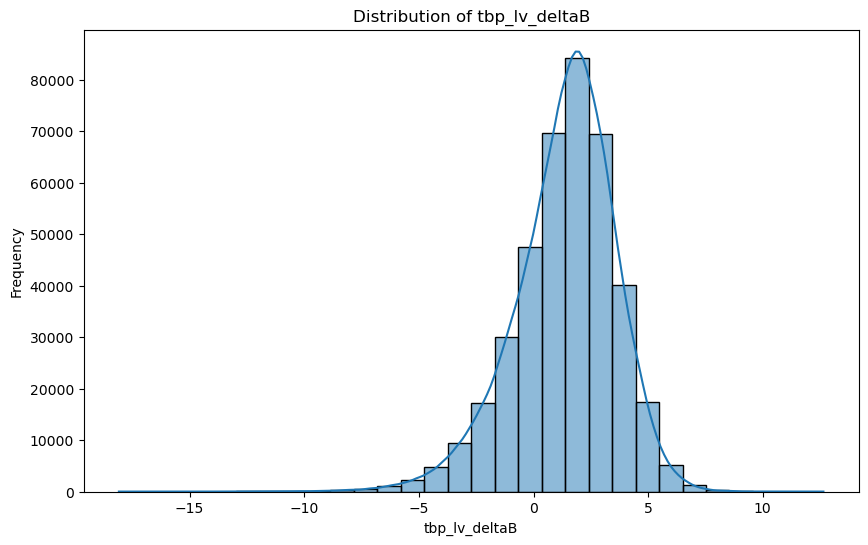

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


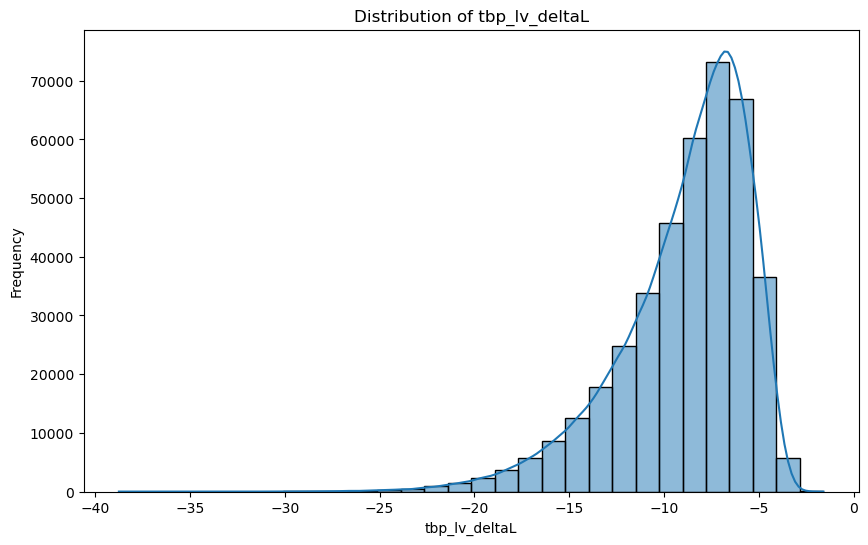

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


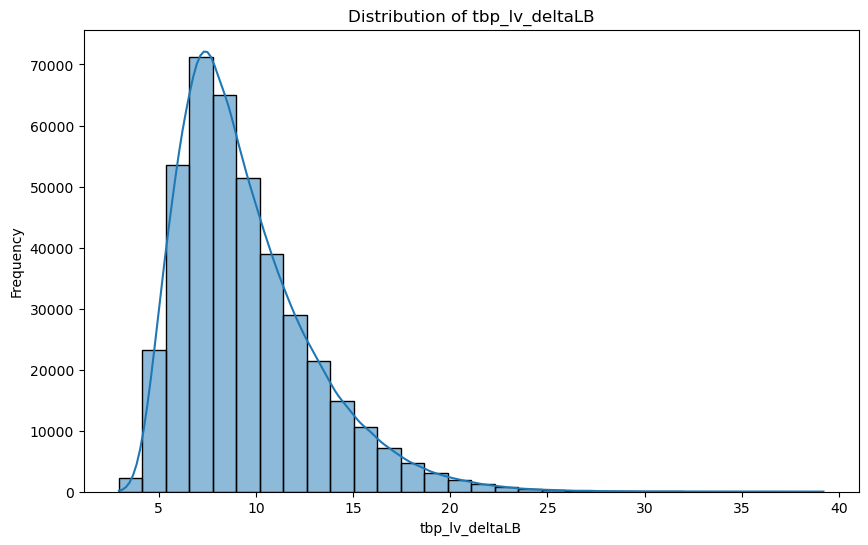

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


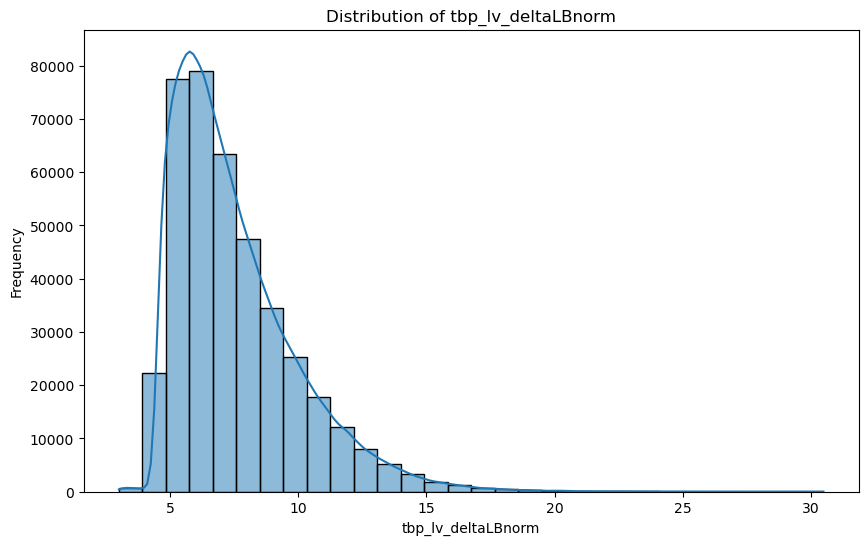

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


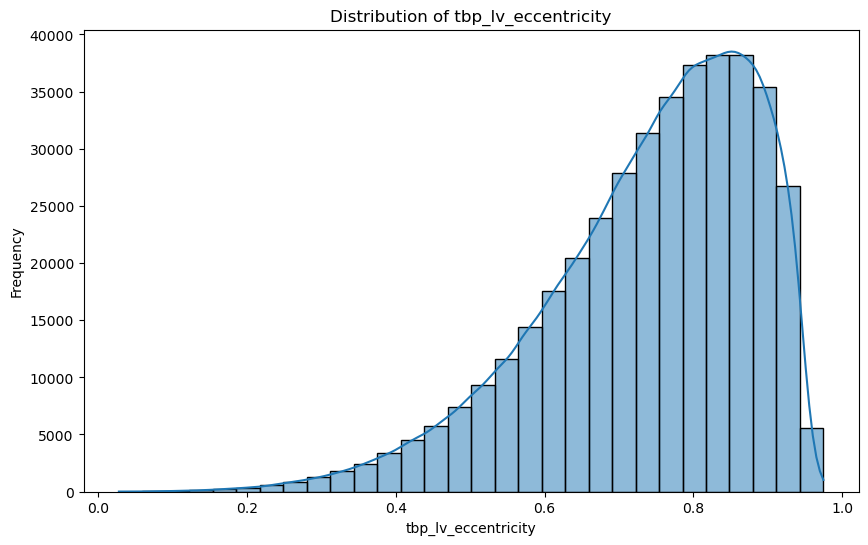

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


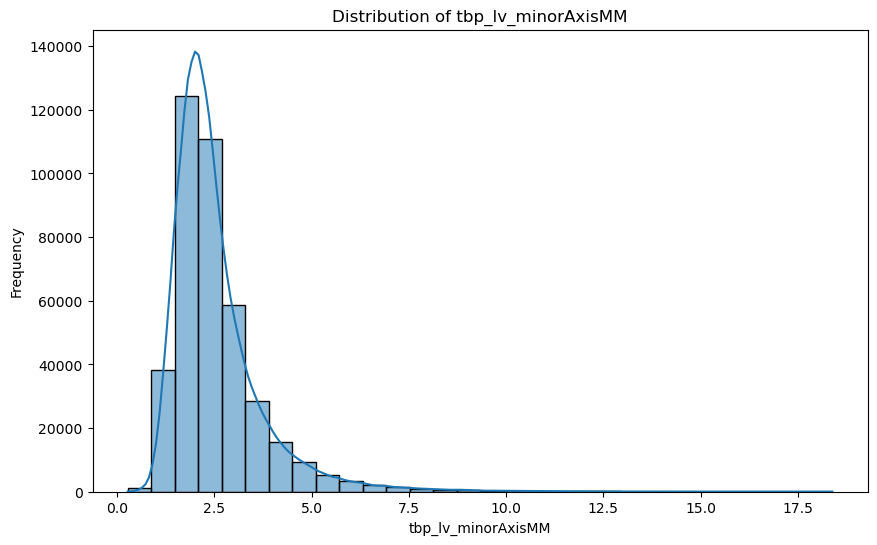

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


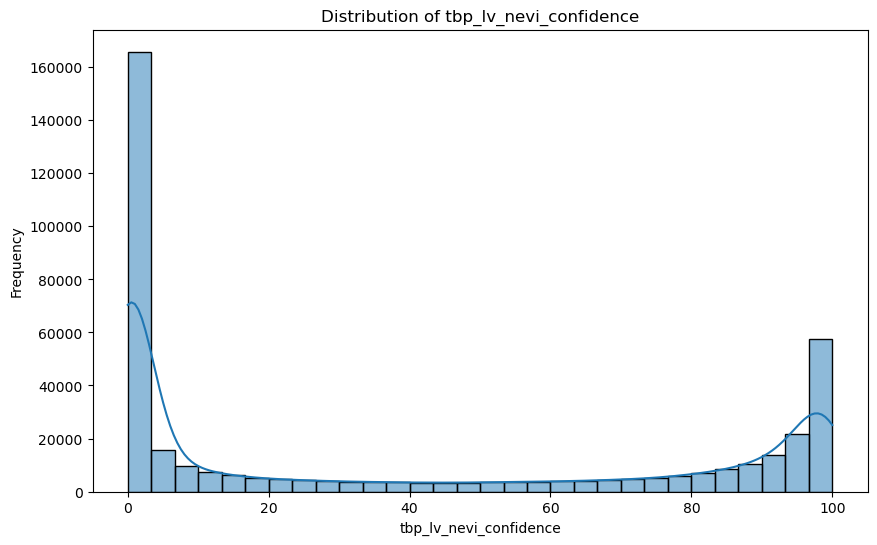

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


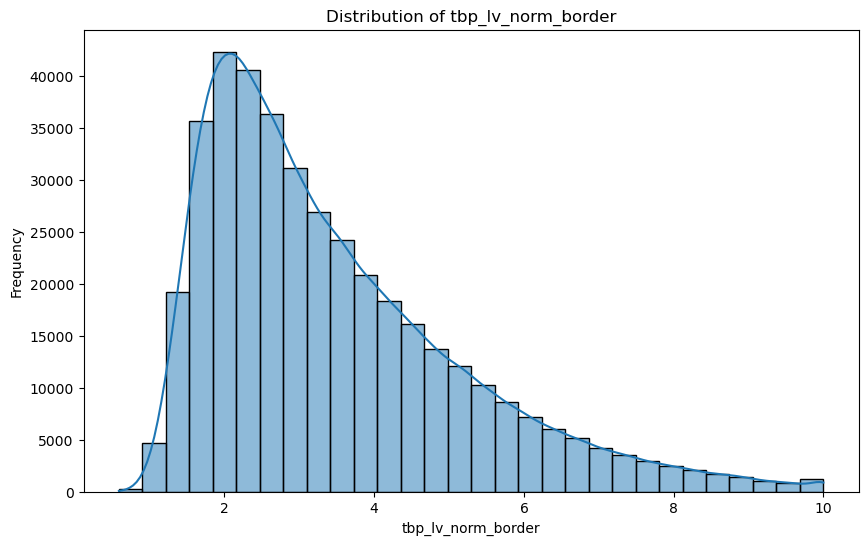

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


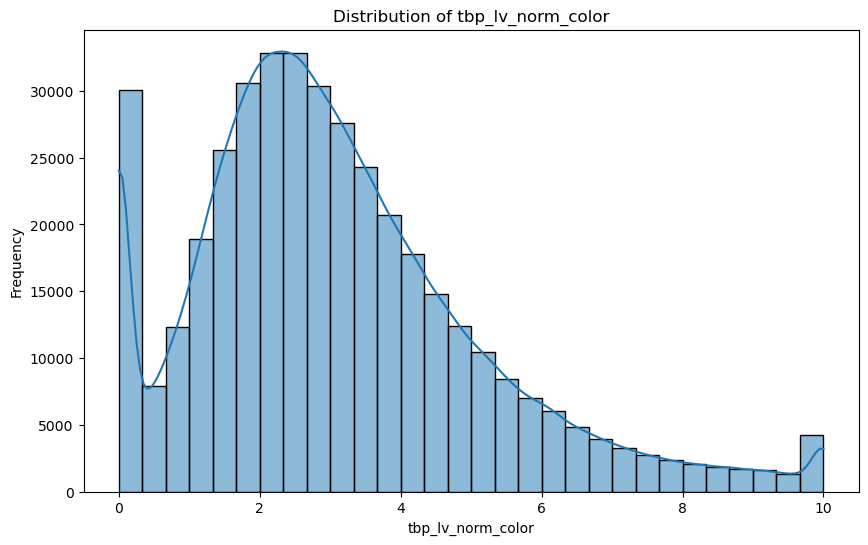

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


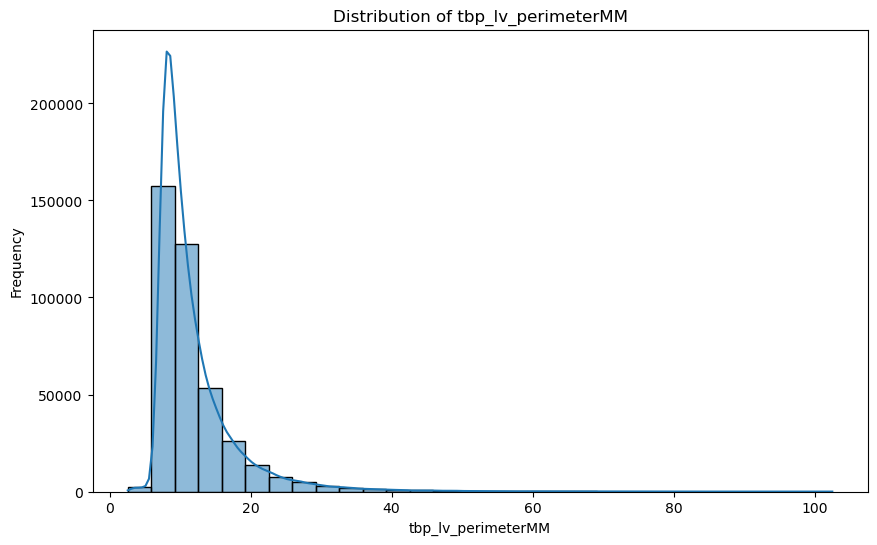

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


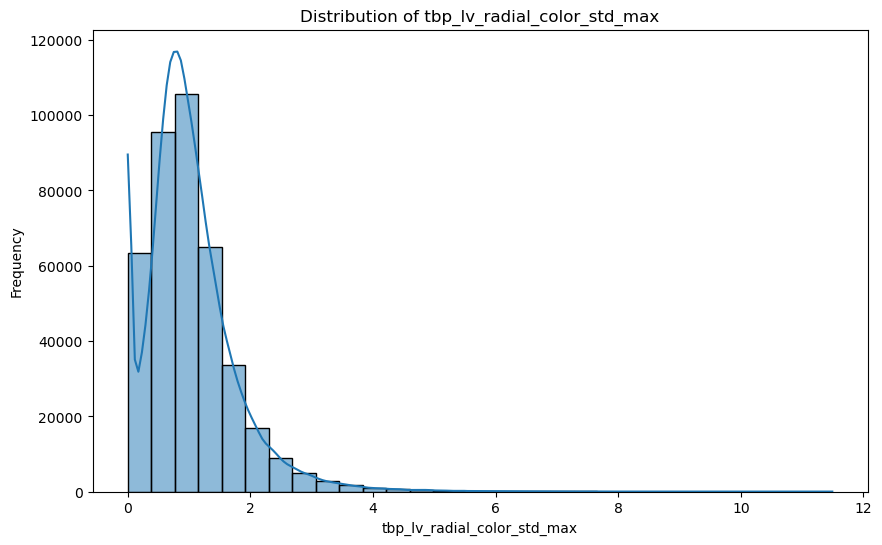

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


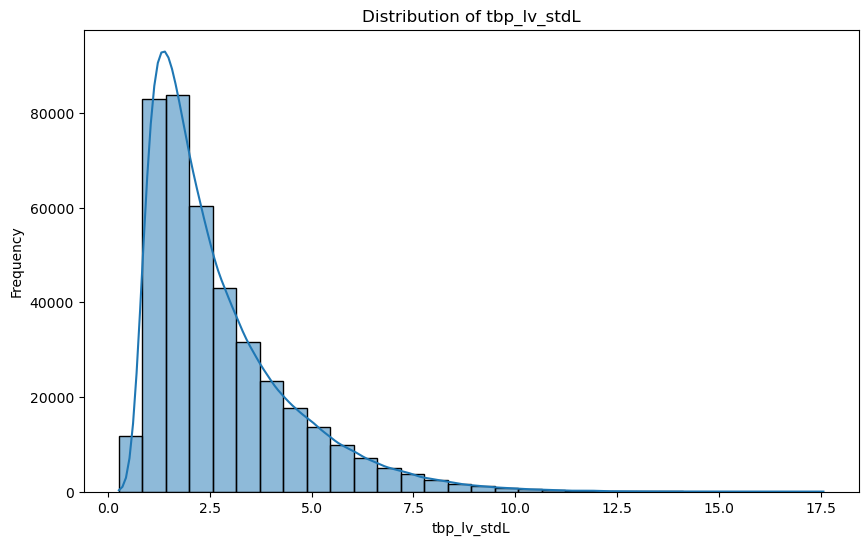

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


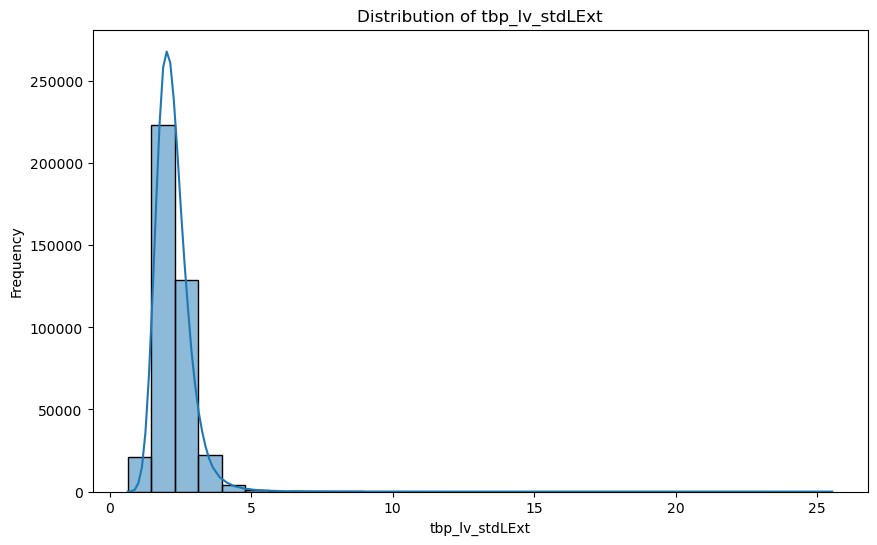

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


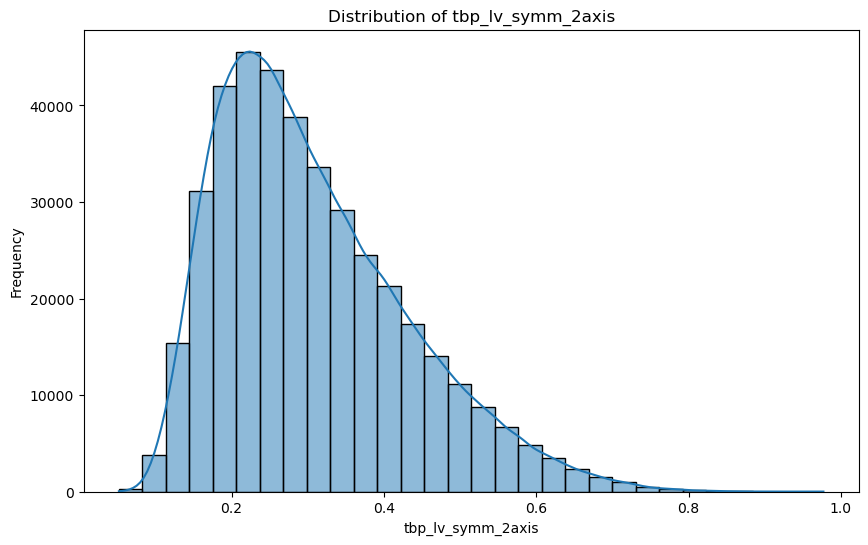

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


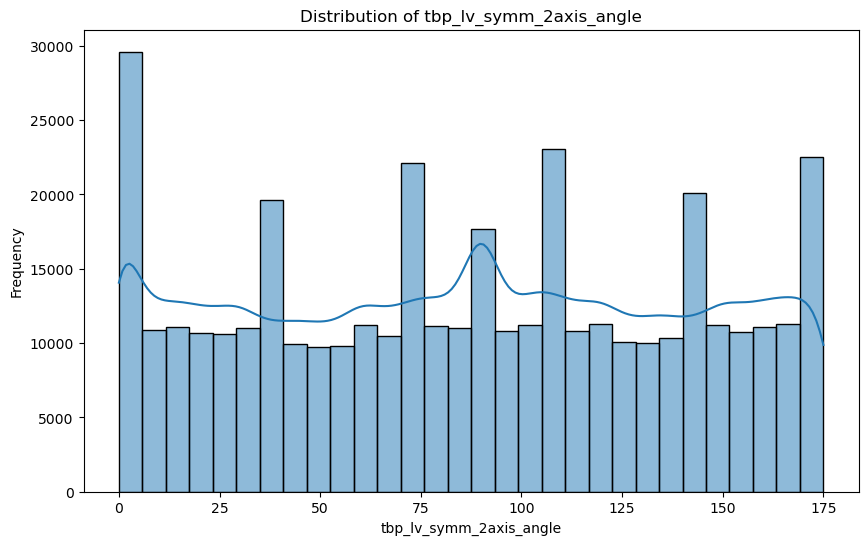

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


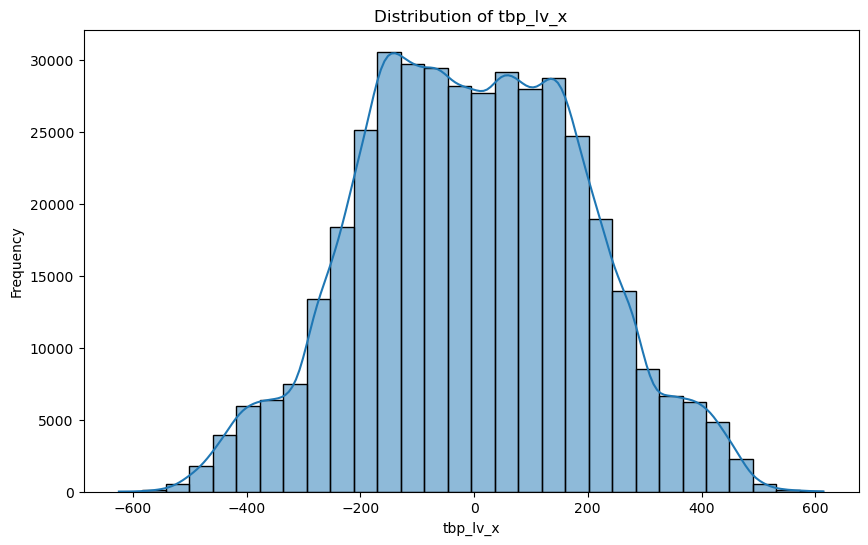

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


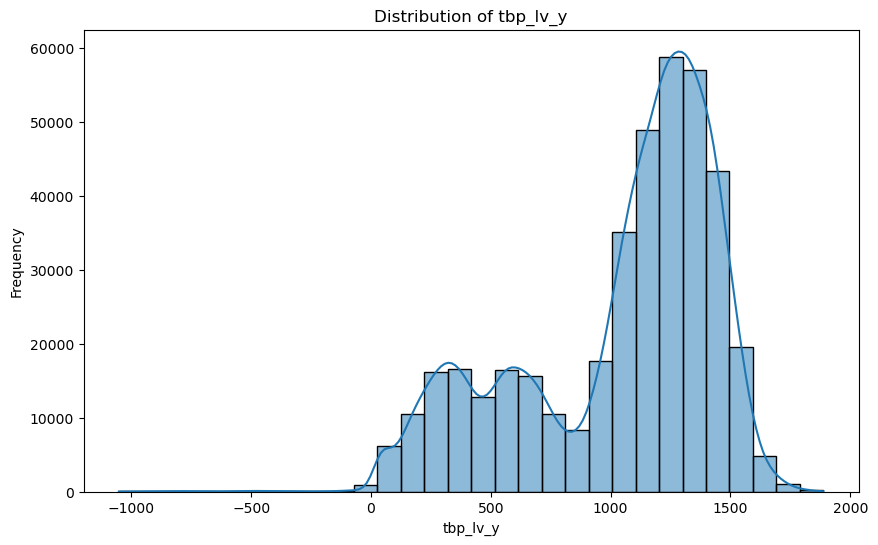

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


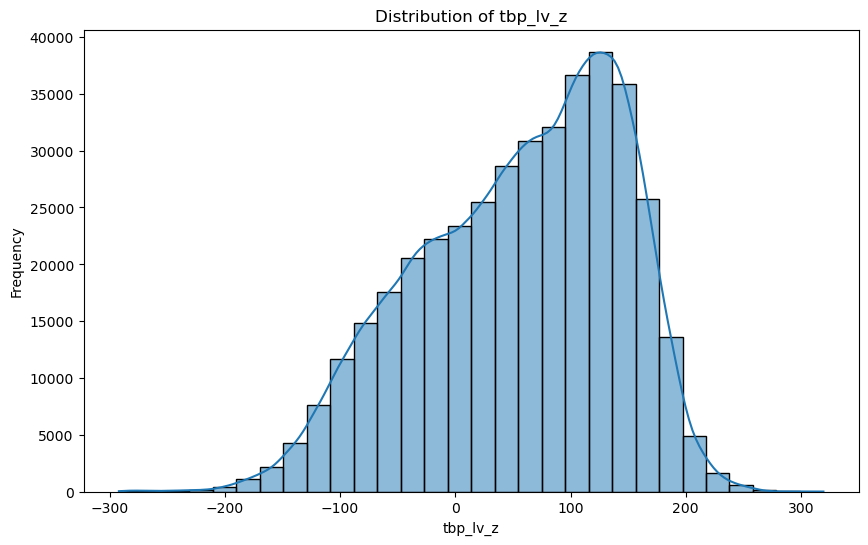

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


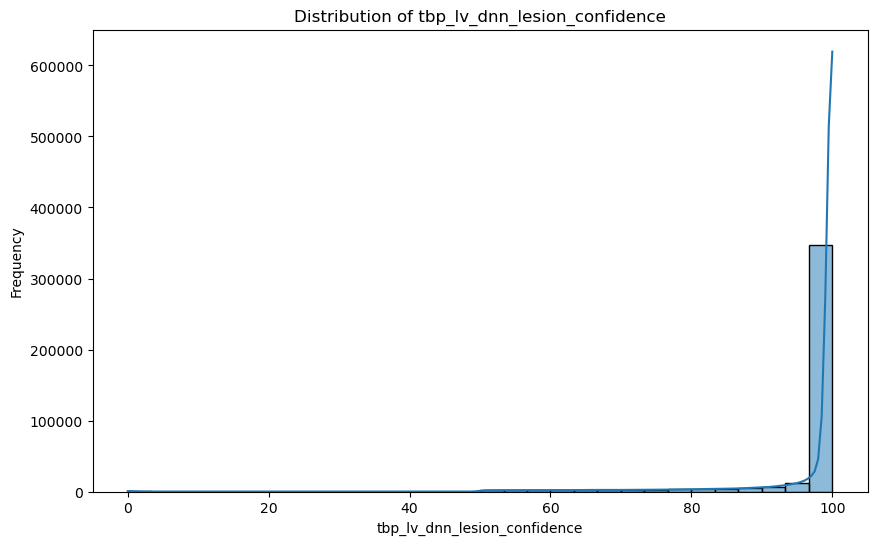

In [15]:
def plot_distribution(dataframe, columns=None):
    # If no columns, select all numerical columns
    if columns is None:
        columns = dataframe.select_dtypes(include=['int', 'float'])
    
    # If column specified, plot the distribution
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(dataframe[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
column_wo_na_num=column_wo_na.select_dtypes(include=['int', 'float'])
plot_distribution(train_metadata,column_wo_na_num)

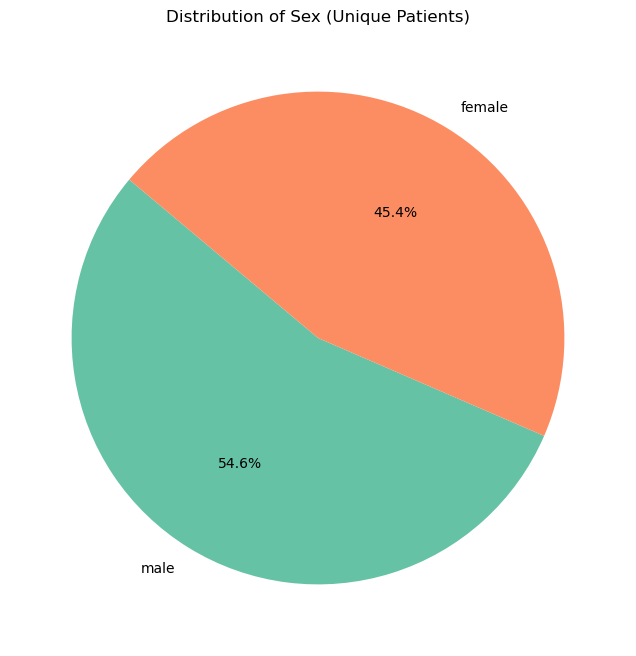

In [12]:
# Plot the distribution of 'sex' for unique patients
sex_counts = unique_patients['sex'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Distribution of Sex (Unique Patients)")
plt.show()

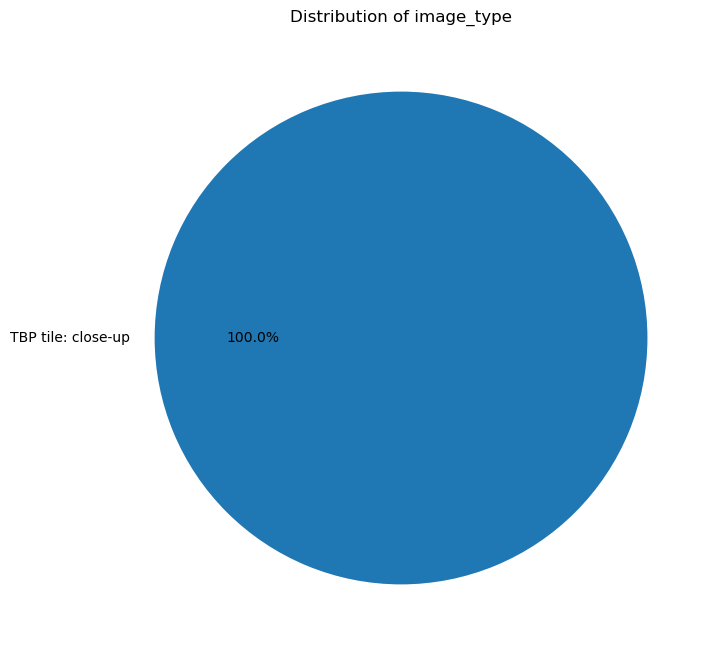

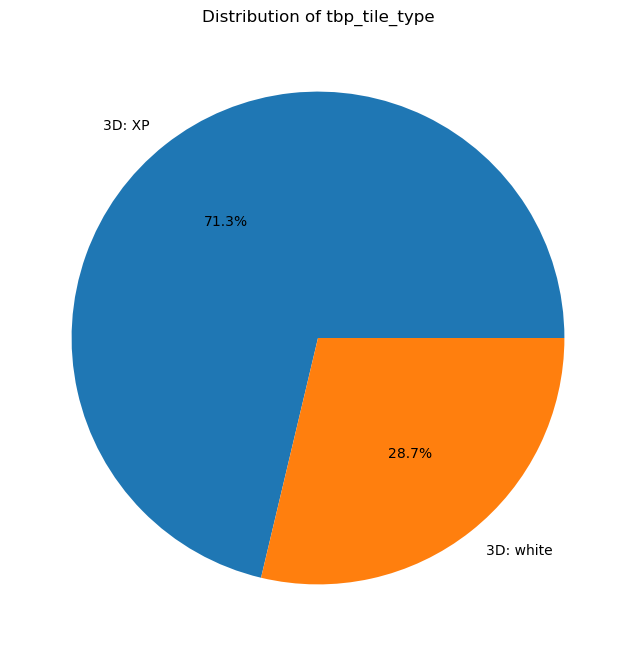

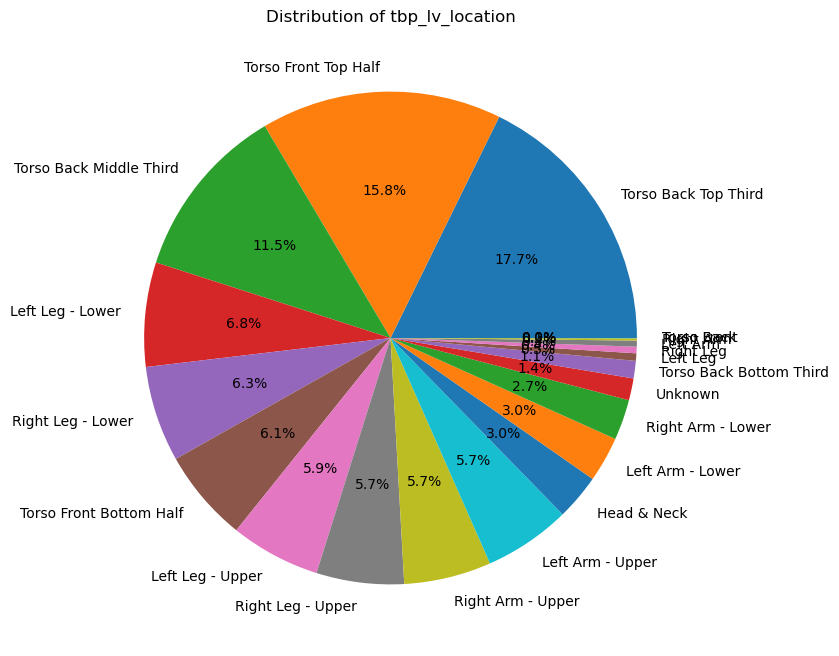

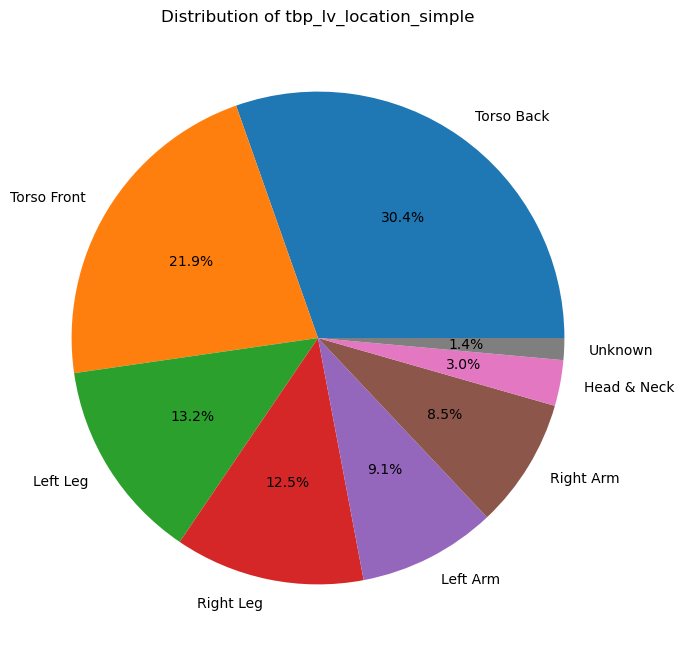

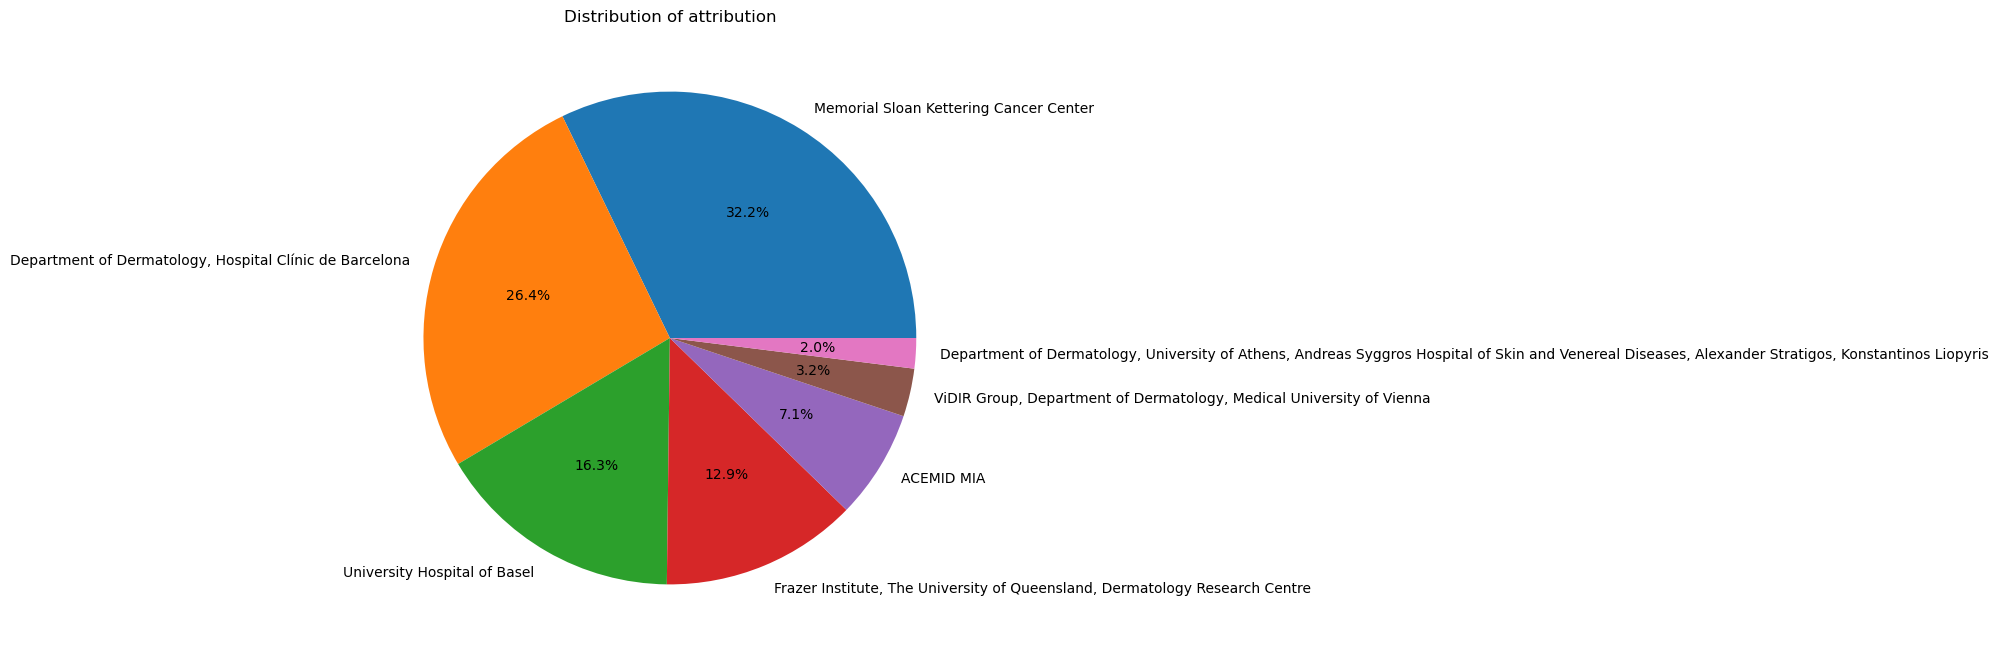

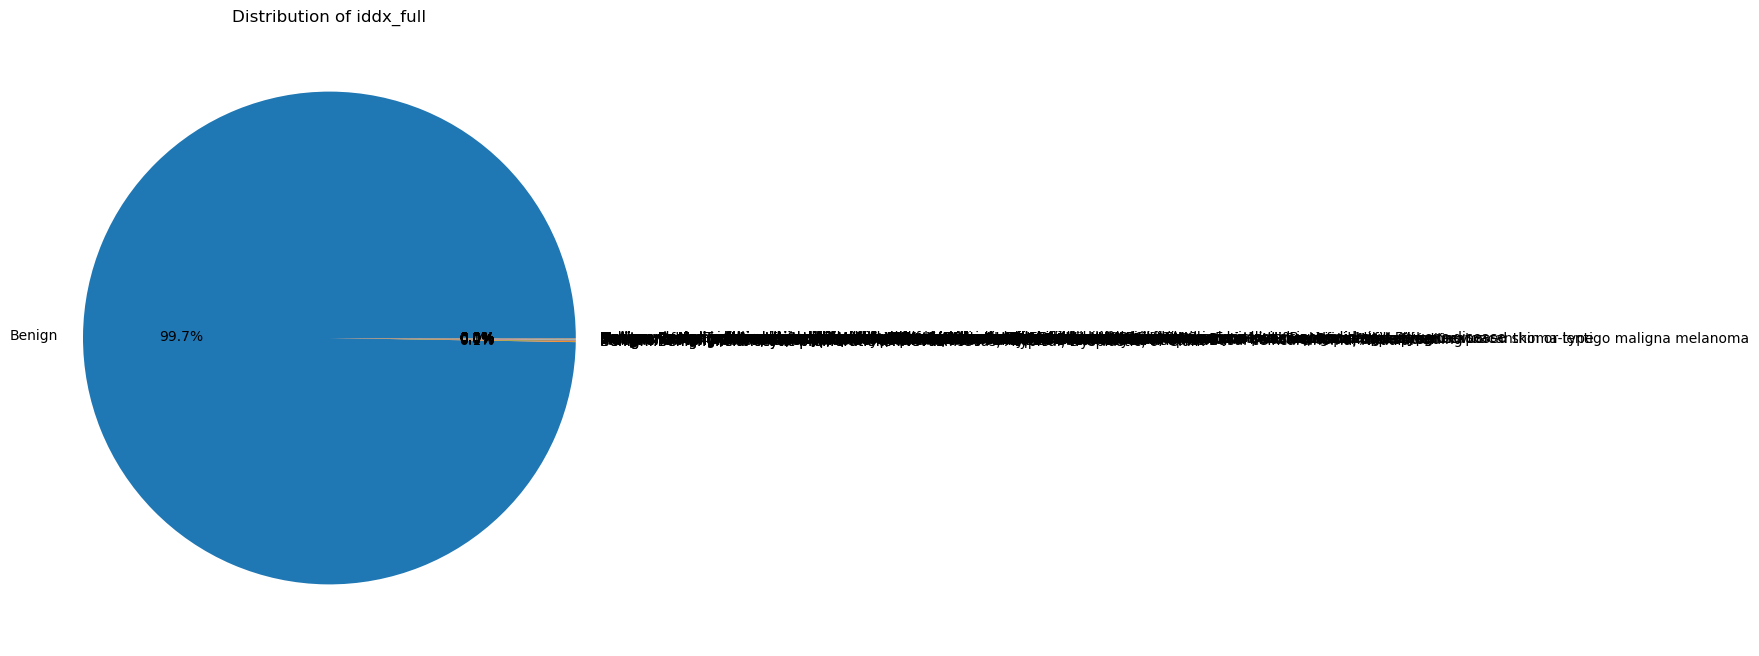

In [13]:
def plot_pie_charts(dataframe, columns=None):
    # If no columns , select all categorical columns
    if columns is None:
        columns = dataframe.select_dtypes(include=['object'])

    
    # If column specified, plot pie chart
    for column in columns:

        plt.figure(figsize=(8, 8))
        value_counts = dataframe[column].value_counts()
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
        plt.title(f'Distribution of {column}')
       # plt.ylabel('')
        plt.show()

column_wo_na_obj=column_wo_na.select_dtypes(include=['object'])
plot_pie_charts(train_metadata,column_wo_na_obj)



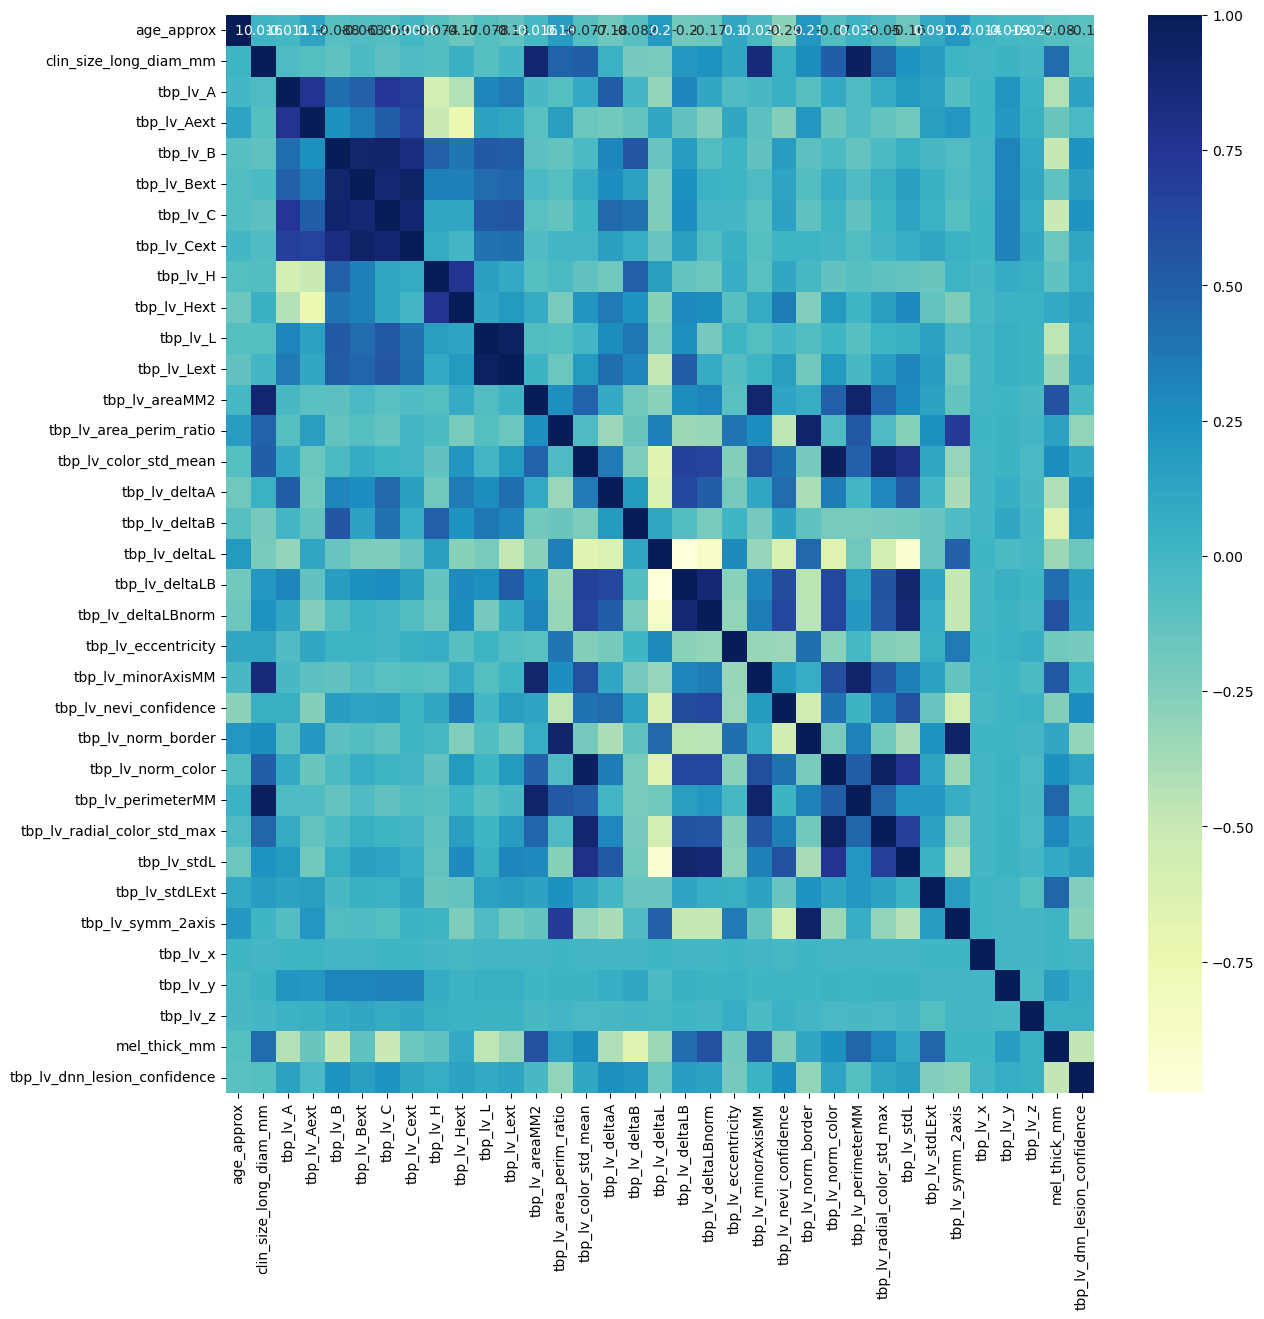

In [25]:
# Correlation matrix
column_numeric = train_metadata.select_dtypes(include = ['float'])


# Calculate the correlation matrix
column_numeric.corr()

plt.figure(figsize = (14,14))
sns.heatmap(column_numeric.corr(), annot = True, cmap = 'YlGnBu')
plt.show()


In [16]:
# Load the sample submission data
sample_submission = pd.read_csv(os.path.join(base_path, "sample_submission.csv"))
# Load the HDF5 file
hdf5_file_path=os.path.join(base_path, "train-image.hdf5")
with h5py.File(hdf5_file_path, 'r') as hdf:
    # Extract the image data for the specified ISIC IDs
    image_data = {}
    for isic_id in sample_submission['isic_id']:
        if isic_id in hdf:
            image_data[isic_id] = np.array(hdf[isic_id])
        else:
            print(f"ISIC ID {isic_id} not found in the HDF5 file.")

# Analyze the extracted image data
for isic_id, image in image_data.items():
    print(f"Analysis for {isic_id}:")
    print(f" - Shape: {image.shape}")
    print(f" - Width: {image.shape[1]}")
    print(f" - Height: {image.shape[0]}")
    print(f" - Channels: {image.shape[2] if len(image.shape) > 2 else 1}")
    print(f" - Data type: {image.dtype}")
    print(f" - Min pixel value: {image.min()}")
    print(f" - Max pixel value: {image.max()}")
    print(f" - Mean pixel value: {image.mean()}")
    print()

ISIC ID ISIC_0015657 not found in the HDF5 file.
ISIC ID ISIC_0015729 not found in the HDF5 file.
ISIC ID ISIC_0015740 not found in the HDF5 file.


Analysis for ISIC_0015670:


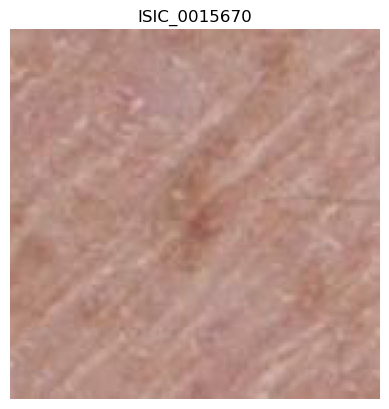

 - Shape: (139, 139, 3)
 - Width: 139
 - Height: 139
 - Min pixel value: 79
 - Max pixel value: 223
 - Mean pixel value: 151.78643272432413

Analysis for ISIC_0015845:


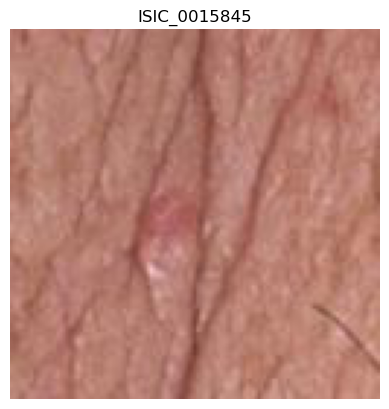

 - Shape: (127, 127, 3)
 - Width: 127
 - Height: 127
 - Min pixel value: 46
 - Max pixel value: 250
 - Mean pixel value: 137.71312542625085



In [23]:
# ID picture to analiize
image_ids_to_analyze = ['ISIC_0015670', 'ISIC_0015845']

# Load HDF5 File
hdf5_file_path = os.path.join(base_path, "train-image.hdf5")
with h5py.File(hdf5_file_path, 'r') as hdf:
    # Data for specified picture
    image_data = {}
    for isic_id in image_ids_to_analyze:
        if isic_id in hdf:
            image_data[isic_id] = hdf[isic_id][()]
        else:
            print(f"ISIC ID {isic_id} not found in the HDF5 file.")

# Analize picture
for isic_id, image_binary in image_data.items():
    print(f"Analysis for {isic_id}:")
    if isinstance(image_binary, bytes):  # If data binary
        image = Image.open(io.BytesIO(image_binary))
        image_array = np.array(image)
        plt.imshow(image)
        plt.title(f'{isic_id}')
        plt.axis('off')
        plt.show()
        print(f" - Shape: {image_array.shape}")
        print(f" - Width: {image.width}")
        print(f" - Height: {image.height}")
        print(f" - Min pixel value: {image_array.min()}")
        print(f" - Max pixel value: {image_array.max()}")
        print(f" - Mean pixel value: {image_array.mean()}")
    else:
        print(f" - Shape: {image_binary.shape}")
        print(f" - Width: {image_binary.shape[1]}")
        print(f" - Height: {image_binary.shape[0]}")
        print(f" - Channels: {image_binary.shape[2] if len(image_binary.shape) > 2 else 1}")
        print(f" - Data type: {image_binary.dtype}")
        print(f" - Min pixel value: {image_binary.min()}")
        print(f" - Max pixel value: {image_binary.max()}")
        print(f" - Mean pixel value: {image_binary.mean()}")
    print()
